In [ ]:
import numpy as np
import json
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def get_iou(a, b):
    x1 = max(a[0], b[0])
    y1 = max(a[1], b[1])
    x2 = min(a[2], b[2])
    y2 = min(a[3], b[3])

    width = (x2 - x1)
    height = (y2 - y1)

    if (width < 0) or (height < 0):
        return 0.0
    area_overlap = width * height

    area_a = (a[2] - a[0]) * (a[3] - a[1])
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    area_combined = area_a + area_b - area_overlap

    iou = area_overlap / (area_combined)
    return iou

In [ ]:
f = open("Melli.json", encoding="utf8")
data = json.load(f)
f.close()

In [ ]:
points = []
for i, shape in enumerate(data["shapes"]):
  points.append([shape['points'][0][0], shape['points'][0][1], shape['points'][2][0], shape['points'][2][1]])
  print(f"\nFace{i + 1}:\n{points[i]}")


Face1:
[151.27118644067798, 123.72881355932203, 251.271186440678, 238.135593220339]

Face2:
[307.2033898305085, 125.42372881355934, 406.3559322033899, 237.28813559322035]

Face3:
[481.77966101694915, 77.11864406779661, 577.542372881356, 181.35593220338984]

Face4:
[669.0677966101695, 122.88135593220339, 754.6610169491526, 227.11864406779662]

Face5:
[829.2372881355932, 118.64406779661017, 902.1186440677966, 214.40677966101697]

Face6:
[986.8644067796611, 108.47457627118645, 1074.1525423728815, 216.10169491525426]

Face7:
[919.9152542372882, 214.40677966101697, 994.491525423729, 321.1864406779661]

Face8:
[710.5932203389831, 235.59322033898306, 784.3220338983051, 340.67796610169495]

Face9:
[497.0338983050848, 250.84745762711867, 582.6271186440678, 353.3898305084746]

Face10:
[316.5254237288136, 258.47457627118644, 390.25423728813564, 366.10169491525426]

Face11:
[141.10169491525426, 277.11864406779665, 217.3728813559322, 381.35593220338984]


In [ ]:
im = cv2.imread("Melli.jpg")
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
print('Total Number of Region Proposals: {}'.format(len(rects)))

Total Number of Region Proposals: 8750


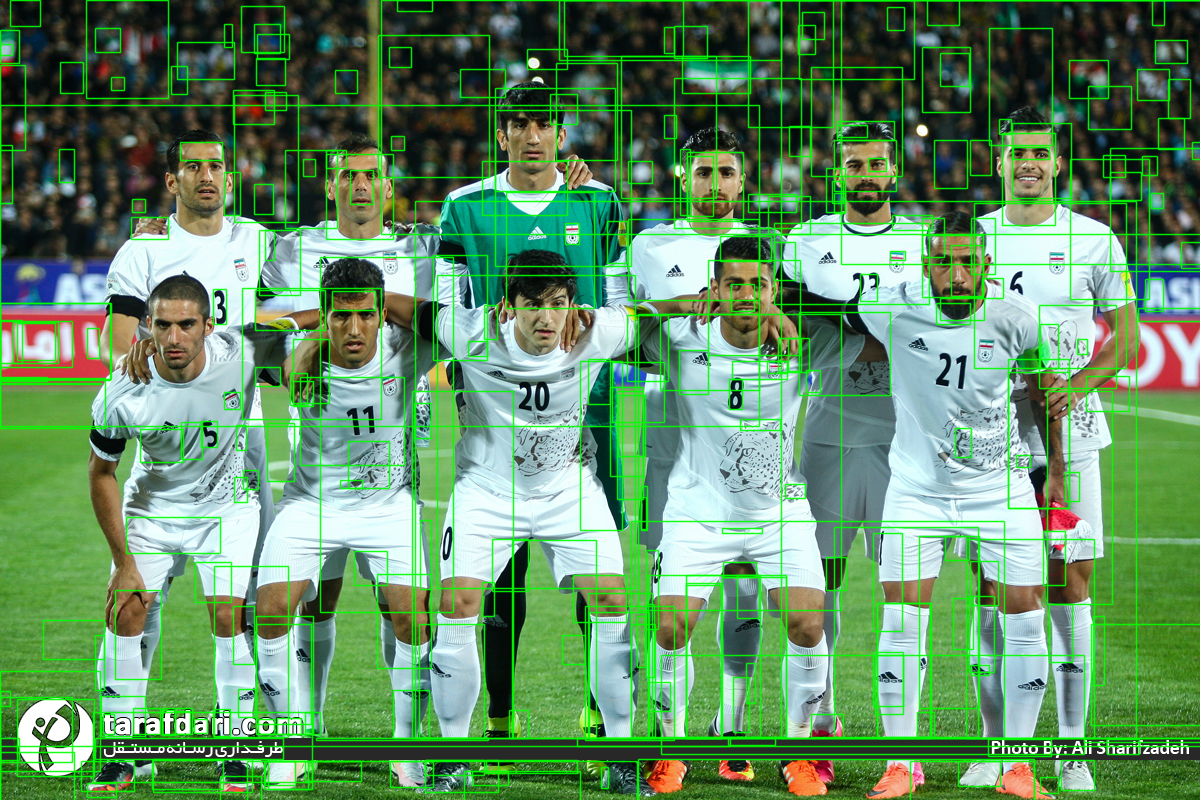

In [ ]:
imOut = im.copy()
for i, rect in enumerate(rects):
  if (i < 300):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
  else:
    break
cv2_imshow(imOut)

In [ ]:
result = []
for proposal in rects:
  for gt in points:
    x, y, w, h = proposal
    boxA = [x, y, x + w, y + h]
    iou = get_iou(boxA, gt)
    if(iou > 0.6):
      result.append([boxA, "Face"])
    if(iou < 0.3):
      result.append([boxA, "BackGround"])
    else:
      continue

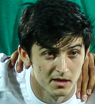

Class: Face



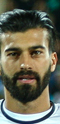

Class: Face



Class: BackGround



Class: BackGround



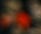

Class: BackGround



In [ ]:
faces = []
bg = []
im = cv2.imread("Melli.jpg")
img = im.copy()

for i, r in enumerate(result):
  if(r[1] == 'Face'):
    faces.append(i)
  else:
    bg.append(i)

index = [faces[5], faces[100], bg[217], bg[17], bg[87]]

for i in index:
  x1, y1, x2, y2 = result[i][0]
  crop_img = img[y1:y2, x1:x2]
  cv2_imshow(crop_img)
  print(f"Class: {result[i][1]}\n")